In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [3]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


In [5]:
df.shape

(9994, 11)

In [6]:
df.size

109934

In [7]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [8]:
df.duplicated().value_counts()

False    9994
dtype: int64

In [9]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [11]:
df['Order Date'] = df['Order Date'].apply(pd. to_datetime)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


In [13]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [14]:
df.nunique()

Order ID         9994
Customer Name      50
Category            7
Sub Category       23
City               24
Order Date       1236
Region              5
Sales            1989
Discount           26
Profit           8380
State               1
dtype: int64

In [15]:
# Calculate the count of each category
category_count = df['Category'].value_counts()

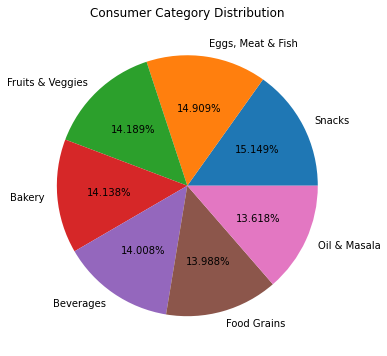

In [16]:
# Create a pie chart
fig, ax = plt.subplots(figsize =(15,6))
ax.pie(category_count, labels = category_count.index, autopct = '%1.3f%%')
ax.set_title('Consumer Category Distribution')

plt.show()

In [17]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1619
North         1
Name: Region, dtype: int64

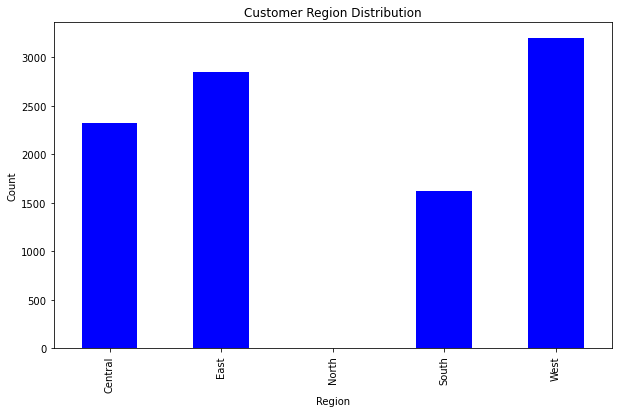

In [22]:
# Create a histogram of regions
fig, ax = plt.subplots(figsize = (10,6))
df['Region'].value_counts().sort_index().plot(kind = 'bar',color ='blue', ax = ax)
ax.set_xlabel('Region')
ax.set_ylabel('Count')
ax.set_title('Customer Region Distribution')

plt.show()

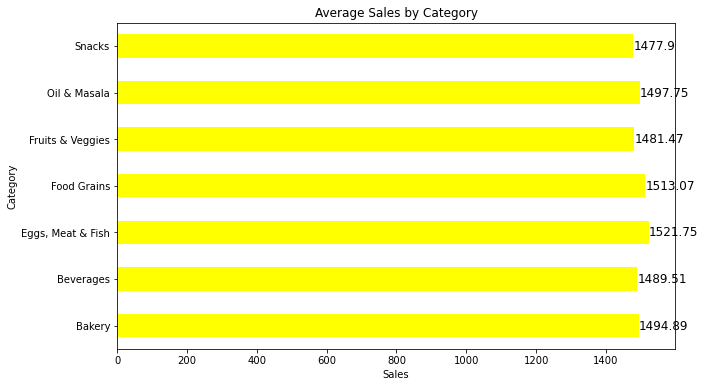

In [18]:
# Create a horizontal bar chart to visualize the average sales for each category
category_mean = df.groupby('Category')['Sales'].mean()
plt.figure(figsize = (10,6))
category_mean.plot(kind ='barh', color = 'yellow')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.title('Average Sales by Category')

# Add labels to the bars
for i, mean in enumerate(category_mean):
    plt.text(mean+0.1, i, str(round(mean,2)), va ='center', fontsize = 12)
plt.show()

In [19]:
df['City'].value_counts()

Kanyakumari       459
Tirunelveli       446
Bodi              442
Krishnagiri       440
Vellore           435
Perambalur        434
Tenkasi           432
Chennai           432
Salem             431
Karur             430
Pudukottai        430
Coimbatore        428
Ramanadhapuram    421
Cumbum            417
Virudhunagar      416
Madurai           408
Ooty              404
Namakkal          403
Viluppuram        397
Dindigul          396
Theni             387
Dharmapuri        376
Nagercoil         373
Trichy            357
Name: City, dtype: int64

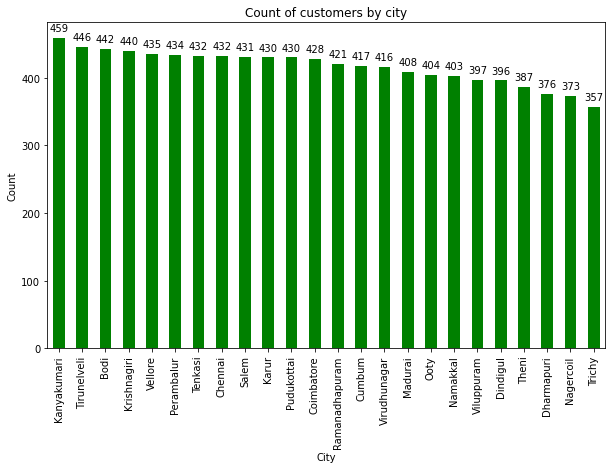

In [22]:
#get the customer count for each city
city_count = df['City'].value_counts()

#Create a bar chart to visualize the count of each city
fig, ax = plt.subplots(figsize = (10,6))
city_count.plot(kind = 'bar', color = 'green')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of customers by city')

# add labels to the bars
for i, count in enumerate(city_count):
    plt.text(i, count+10, str(count), ha ='center')

plt.show()

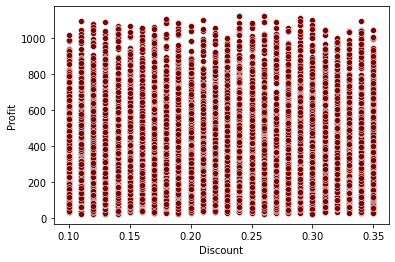

In [32]:
# Create a scatter plot to visualize the relationship between discount and profit
sns.scatterplot(x ='Discount', y ='Profit', color ='maroon', data =df)
plt.show()